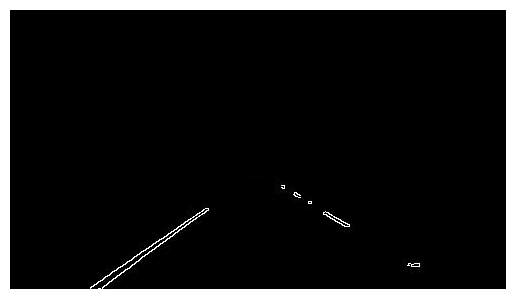

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# Region-of-interest vertices
# We want a trapezoid shape, with bottom edge at the bottom of the image
trap_bottom_width = 0.85  # width of bottom edge of trapezoid, expressed as percentage of image width
trap_top_width = 0.07  # ditto for top edge of trapezoid
trap_height = 0.4  # height of the trapezoid expressed as percentage of image height
image_in = mpimg.imread('Transformation4.jpg')
image = mpimg.imread('Transformation1.jpg')
imshape = image.shape
vertices = np.array([[\
    ((imshape[1] * (1 - trap_bottom_width)) // 2, imshape[0]),\
    ((imshape[1] * (1 - trap_top_width)) // 2, imshape[0] - imshape[0] * trap_height),\
    (imshape[1] - (imshape[1] * (1 - trap_top_width)) // 2, imshape[0] - imshape[0] * trap_height),\
    (imshape[1] - (imshape[1] * (1 - trap_bottom_width)) // 2, imshape[0])]]\
    , dtype=np.int32)
masked_edges = region_of_interest(image_in, vertices)
plt.imshow(masked_edges, cmap='gray')
plt.axis('off')
transformation = plt.imshow
plt.savefig('Transformation5.jpg',bbox_inches='tight',transparent=True, pad_inches=0)